# Generate WordCloud Pidato Presiden Joko Widodo
### Pidato Presiden RI pada Sidang Tahunan MPR RI dan Sidang Bersama DPD RI dan DPR RI dalam rangka HUT Ke-76 Proklamasi Kemerdekaan Republik Indonesia, 16 Agustus 2021
<hr>

#### Definisi WordCloud
##### <i>Word Cloud adalah teknik visualisasi data yang digunakan untuk merepresentasikan data teks di mana ukuran setiap kata menunjukkan frekuensi atau kepentingannya</i>
<hr>

In [6]:
#!pip install matplotlib
#!pip install BeautifulSoup4
#!pip install pySastrawi
#!pip install wordcloud
#!pip install scikit-learn
#!pip install scikit-learnww

import requests
import string
import re

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import wordcloud
from wordcloud import WordCloud

Matplotlib is building the font cache; this may take a moment.


#### Scrapping Data menggunakan Request & Decompose menggunakan BeautifulSoup
<hr>

In [7]:
## Scrapping data
#web = requests.get('https://setkab.go.id/pengarahan-kepada-komisaris-dan-direksi-pt-pertamina-dan-pt-pln-di-istana-kepresidenan-bogor-provinsi-jawa-barat-16-november-2021/').text
web = requests.get('https://setkab.go.id/pidato-presiden-ri-pada-sidang-tahunan-mpr-ri-dan-sidang-bersama-dpd-ri-dan-dpr-ri-dalam-rangka-hut-ke-76-proklamasi-kemerdekaan-republik-indonesia-16-agustus-2021/').text
soup = BeautifulSoup(web)

for s in soup(['script','style']):
    s.decompose()

pidatoTeks = ' '.join(soup.stripped_strings)
print(pidatoTeks)

Sekretariat Kabinet Republik Indonesia | Pidato Presiden RI pada Sidang Tahunan MPR RI dan Sidang Bersama DPD RI dan DPR RI dalam rangka HUT Ke-76 Proklamasi Kemerdekaan Republik Indonesia, 16 Agustus 2021 BERANDA PROFIL Tentang Setkab Sejarah Sekretariat Kabinet Struktur Organisasi Sekretariat Kabinet Profil Eselon I Webmail PUBLIKASI Pidato Presiden Berita Opini Peraturan Galeri Galeri Foto Galeri Video Galeri Infografis Galeri Buku Elektronik Nusantara DWP SETKAB INFORMASI & LAYANAN PUBLIK Layanan Publik PPID LAPOR! SIPPU SISKAB JFP Link Lembaga Pengumuman Zona Integritas e-Announcement LHKPN PEMERINTAH Kabinet Pemerintahan Indonesia Capaian Pemerintah Pemantauan Dan Evaluasi Perencanaan dan Laporan Kinerja ID ID (Indonesia) EN (English) Cari untuk: Pidato Presiden RI pada Sidang Tahunan MPR RI dan Sidang Bersama DPD RI dan DPR RI dalam rangka HUT Ke-76 Proklamasi Kemerdekaan Republik Indonesia, 16 Agustus 2021 Oleh Humas Dipublikasikan pada 16 Agustus 2021 Kategori: Sambutan Dibaca

In [8]:
## Cleaning data
pidatoTeks = pidatoTeks.lower() #Menghilangkan huruf kapital
pidatoTeks = re.sub(r"\d+","",pidatoTeks) #Menghilangkan angka
pidatoTeks = pidatoTeks.translate(str.maketrans("","",string.punctuation)) #Menghilangkan tanda baca
pidatoTeks = pidatoTeks.strip() #Menghilangkan karakter kosong
print(pidatoTeks)

sekretariat kabinet republik indonesia  pidato presiden ri pada sidang tahunan mpr ri dan sidang bersama dpd ri dan dpr ri dalam rangka hut ke proklamasi kemerdekaan republik indonesia  agustus  beranda profil tentang setkab sejarah sekretariat kabinet struktur organisasi sekretariat kabinet profil eselon i webmail publikasi pidato presiden berita opini peraturan galeri galeri foto galeri video galeri infografis galeri buku elektronik nusantara dwp setkab informasi  layanan publik layanan publik ppid lapor sippu siskab jfp link lembaga pengumuman zona integritas eannouncement lhkpn pemerintah kabinet pemerintahan indonesia capaian pemerintah pemantauan dan evaluasi perencanaan dan laporan kinerja id id indonesia en english cari untuk pidato presiden ri pada sidang tahunan mpr ri dan sidang bersama dpd ri dan dpr ri dalam rangka hut ke proklamasi kemerdekaan republik indonesia  agustus  oleh humas dipublikasikan pada  agustus  kategori sambutan dibaca  kali bismillahirrahmanirrahim assa

#### Stemming
<hr>

In [9]:
## Stemming kata
factory = StemmerFactory()
stemmer = factory.create_stemmer()
pidatoTeks = stemmer.stem(pidatoTeks)
print(pidatoTeks)

sekretariat kabinet republik indonesia pidato presiden ri pada sidang tahun mpr ri dan sidang sama dpd ri dan dpr ri dalam rangka hut ke proklamasi merdeka republik indonesia agustus beranda profil tentang setkab sejarah sekretariat kabinet struktur organisasi sekretariat kabinet profil eselon i webmail publikasi pidato presiden berita opini atur galeri galeri foto galeri video galeri infografis galeri buku elektronik nusantara dwp setkab informasi layan publik layan publik ppid lapor sippu siskab jfp link lembaga umum zona integritas eannouncement lhkpn perintah kabinet perintah indonesia capai perintah pantau dan evaluasi rencana dan lapor kerja id id indonesia en english cari untuk pidato presiden ri pada sidang tahun mpr ri dan sidang sama dpd ri dan dpr ri dalam rangka hut ke proklamasi merdeka republik indonesia agustus oleh humas publikasi pada agustus kategori sambut baca kali bismillahirrahmanirrahim assalamu alaikum warahmatullahi wabarakatuh selamat pagi salam sejahtera bagi

#### StopWords with Sastrawi
<hr>

In [10]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopwords = factory.create_stop_word_remover()

pidatoTeks = stopwords.remove(pidatoTeks)
print(pidatoTeks)

sekretariat kabinet republik indonesia pidato presiden ri sidang tahun mpr ri sidang dpd ri dpr ri rangka hut proklamasi merdeka republik indonesia agustus beranda profil setkab sejarah sekretariat kabinet struktur organisasi sekretariat kabinet profil eselon webmail publikasi pidato presiden berita opini atur galeri galeri foto galeri video galeri infografis galeri buku elektronik nusantara dwp setkab informasi layan publik layan publik ppid lapor sippu siskab jfp link lembaga umum zona integritas eannouncement lhkpn perintah kabinet perintah indonesia capai perintah pantau evaluasi rencana lapor id id indonesia en english cari pidato presiden ri sidang tahun mpr ri sidang dpd ri dpr ri rangka hut proklamasi merdeka republik indonesia agustus humas publikasi agustus kategori sambut baca bismillahirrahmanirrahim assalamu alaikum warahmatullahi wabarakatuh selamat pagi sejahtera om swastiastu namo buddhaya kebaji hormat wakil presiden republik indonesia profesor kh ma ruf amin hormat ke

#### Tokenizing
<hr>

In [11]:
tokens = [t for t in pidatoTeks.split()]
print(tokens)

['sekretariat', 'kabinet', 'republik', 'indonesia', 'pidato', 'presiden', 'ri', 'sidang', 'tahun', 'mpr', 'ri', 'sidang', 'dpd', 'ri', 'dpr', 'ri', 'rangka', 'hut', 'proklamasi', 'merdeka', 'republik', 'indonesia', 'agustus', 'beranda', 'profil', 'setkab', 'sejarah', 'sekretariat', 'kabinet', 'struktur', 'organisasi', 'sekretariat', 'kabinet', 'profil', 'eselon', 'webmail', 'publikasi', 'pidato', 'presiden', 'berita', 'opini', 'atur', 'galeri', 'galeri', 'foto', 'galeri', 'video', 'galeri', 'infografis', 'galeri', 'buku', 'elektronik', 'nusantara', 'dwp', 'setkab', 'informasi', 'layan', 'publik', 'layan', 'publik', 'ppid', 'lapor', 'sippu', 'siskab', 'jfp', 'link', 'lembaga', 'umum', 'zona', 'integritas', 'eannouncement', 'lhkpn', 'perintah', 'kabinet', 'perintah', 'indonesia', 'capai', 'perintah', 'pantau', 'evaluasi', 'rencana', 'lapor', 'id', 'id', 'indonesia', 'en', 'english', 'cari', 'pidato', 'presiden', 'ri', 'sidang', 'tahun', 'mpr', 'ri', 'sidang', 'dpd', 'ri', 'dpr', 'ri', 'r

#### WordCloud

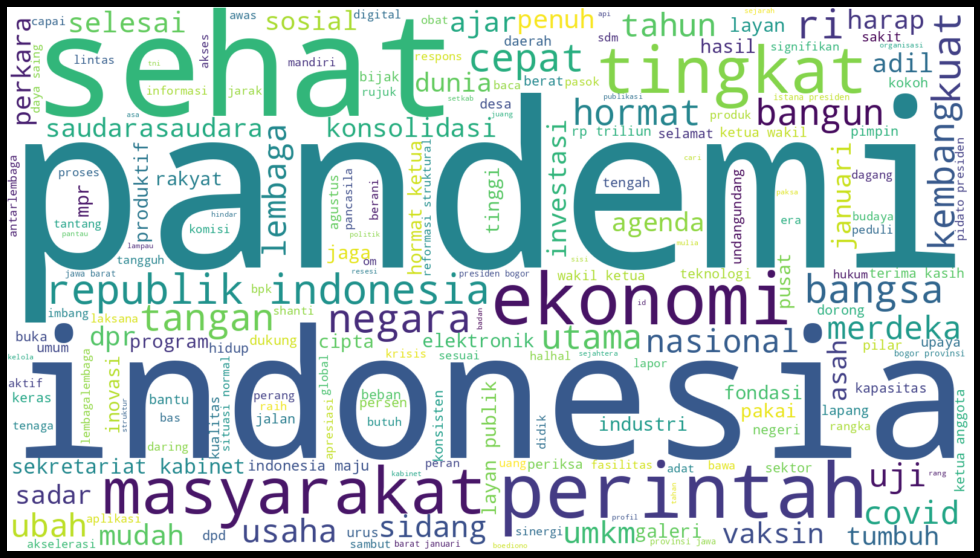

In [12]:
wcloud = WordCloud(width=1600, height=900, 
                   background_color="white", 
                   max_font_size=1000
                  )
wcloud.generate(pidatoTeks)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
from skimage import io

coloring = io.imread('jkw.png')

wcloud = WordCloud(width=1600, height=900, 
                   background_color="white", 
                   max_font_size=1000, 
                   mask=coloring
                  )
wcloud.generate(pidatoTeks)

plt.figure( figsize=(30,20), facecolor='k')
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'skimage'